In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

In [ ]:
df=pd.read_csv('/content/google_review_ratings.csv')
df.head()


,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df.shape

(5456, 26)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
#dropping the irrelavent column
df.drop(columns=['Unnamed: 25'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
df['Category 11']

0        1.7
1        1.7
2        1.7
3       1.73
4        1.7
        ... 
5451    1.02
5452    1.01
5453    0.99
5454    0.97
5455    0.95
Name: Category 11, Length: 5456, dtype: object

In [ ]:
#converting to float datatype
df['Category 11'] = pd.to_numeric(df['Category 11'],errors = 'coerce')


In [ ]:
df.dtypes

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [ ]:
#Renaming the Features using dictionary 
df.rename(columns={'Category 1': 'Avg_church_rate','Category 2':'Avg_resort_rate','Category 3':'Avg_beach_rate','Category 4':'Avg_park_rate','Category 5':'Avg_theatres_rate','Category 6':'Avg_museums_rate','Category 7':'Avg_mall_rate','Category 8':'Avg_zoo_rate','Category 9':'Avg_restaurant_rate','Category 10':'Avg_bar_rate','Category 11':'Avg_localserv_rate',},inplace=True)

In [ ]:
df.rename(columns={'Category 12': 'Avg_pizzashop_rate','Category 13':'Avg_hotels_rate','Category 14':'Avg_juice_rate','Category 15':'Avg_artgallary_rate','Category 16':'Avg_danceclub_rate','Category 17':'Avg_swimpool_rate','Category 18':'Avg_gym_rate','Category 19':'Avg_bakeries_rate','Category 20':'Avg_spa&beauty_rate','Category 21':'Avg_cafe_rate','Category 22':'Avg_viewpoints_rate','Category 23':'Avg_monuments_rate','Category 24':'Avg_garden_rate'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User                 5456 non-null   object 
 1   Avg_church_rate      5456 non-null   float64
 2   Avg_resort_rate      5456 non-null   float64
 3   Avg_beach_rate       5456 non-null   float64
 4   Avg_park_rate        5456 non-null   float64
 5   Avg_theatres_rate    5456 non-null   float64
 6   Avg_museums_rate     5456 non-null   float64
 7   Avg_mall_rate        5456 non-null   float64
 8   Avg_zoo_rate         5456 non-null   float64
 9   Avg_restaurant_rate  5456 non-null   float64
 10  Avg_bar_rate         5456 non-null   float64
 11  Avg_localserv_rate   5455 non-null   float64
 12  Avg_pizzashop_rate   5455 non-null   float64
 13  Avg_hotels_rate      5456 non-null   float64
 14  Avg_juice_rate       5456 non-null   float64
 15  Avg_artgallary_rate  5456 non-null   f

In [ ]:
df=df.fillna(df.mode().iloc[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User                 5456 non-null   object 
 1   Avg_church_rate      5456 non-null   float64
 2   Avg_resort_rate      5456 non-null   float64
 3   Avg_beach_rate       5456 non-null   float64
 4   Avg_park_rate        5456 non-null   float64
 5   Avg_theatres_rate    5456 non-null   float64
 6   Avg_museums_rate     5456 non-null   float64
 7   Avg_mall_rate        5456 non-null   float64
 8   Avg_zoo_rate         5456 non-null   float64
 9   Avg_restaurant_rate  5456 non-null   float64
 10  Avg_bar_rate         5456 non-null   float64
 11  Avg_localserv_rate   5456 non-null   float64
 12  Avg_pizzashop_rate   5456 non-null   float64
 13  Avg_hotels_rate      5456 non-null   float64
 14  Avg_juice_rate       5456 non-null   float64
 15  Avg_artgallary_rate  5456 non-null   f

In [ ]:
df.columns

Index(['User', 'Avg_church_rate', 'Avg_resort_rate', 'Avg_beach_rate',
       'Avg_park_rate', 'Avg_theatres_rate', 'Avg_museums_rate',
       'Avg_mall_rate', 'Avg_zoo_rate', 'Avg_restaurant_rate', 'Avg_bar_rate',
       'Avg_localserv_rate', 'Avg_pizzashop_rate', 'Avg_hotels_rate',
       'Avg_juice_rate', 'Avg_artgallary_rate', 'Avg_danceclub_rate',
       'Avg_swimpool_rate', 'Avg_gym_rate', 'Avg_bakeries_rate',
       'Avg_spa&beauty_rate', 'Avg_cafe_rate', 'Avg_viewpoints_rate',
       'Avg_monuments_rate', 'Avg_garden_rate'],
      dtype='object')

In [ ]:
lst=['Avg_church_rate', 'Avg_resort_rate', 'Avg_beach_rate',
       'Avg_park_rate', 'Avg_theatres_rate', 'Avg_museums_rate',
       'Avg_mall_rate', 'Avg_zoo_rate', 'Avg_restaurant_rate', 'Avg_bar_rate',
       'Avg_localserv_rate', 'Avg_pizzashop_rate', 'Avg_hotels_rate',
       'Avg_juice_rate', 'Avg_artgallary_rate', 'Avg_danceclub_rate',
       'Avg_swimpool_rate', 'Avg_gym_rate', 'Avg_bakeries_rate',
       'Avg_spa&beauty_rate', 'Avg_cafe_rate', 'Avg_viewpoints_rate',
       'Avg_monuments_rate', 'Avg_garden_rate']
df[lst] = df[lst].astype(int)

In [ ]:
df.head()

,User,Avg_church_rate,Avg_resort_rate,Avg_beach_rate,Avg_park_rate,Avg_theatres_rate,Avg_museums_rate,Avg_mall_rate,Avg_zoo_rate,Avg_restaurant_rate,...,Avg_artgallary_rate,Avg_danceclub_rate,Avg_swimpool_rate,Avg_gym_rate,Avg_bakeries_rate,Avg_spa&beauty_rate,Avg_cafe_rate,Avg_viewpoints_rate,Avg_monuments_rate,Avg_garden_rate
0,User 1,0,0,3,3,5,2,5,2,2,...,1,0,0,0,0,0,0,0,0,0
1,User 2,0,0,3,3,5,2,5,2,2,...,1,0,0,0,0,0,0,0,0,0
2,User 3,0,0,3,3,5,2,5,2,2,...,1,0,0,0,0,0,0,0,0,0
3,User 4,0,0,3,3,5,2,5,2,2,...,1,0,0,0,0,0,0,0,0,0
4,User 5,0,0,3,3,5,2,5,2,2,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
new_df=df.iloc[:,1:]
new_df.head()

,Avg_church_rate,Avg_resort_rate,Avg_beach_rate,Avg_park_rate,Avg_theatres_rate,Avg_museums_rate,Avg_mall_rate,Avg_zoo_rate,Avg_restaurant_rate,Avg_bar_rate,...,Avg_artgallary_rate,Avg_danceclub_rate,Avg_swimpool_rate,Avg_gym_rate,Avg_bakeries_rate,Avg_spa&beauty_rate,Avg_cafe_rate,Avg_viewpoints_rate,Avg_monuments_rate,Avg_garden_rate
0,0,0,3,3,5,2,5,2,2,2,...,1,0,0,0,0,0,0,0,0,0
1,0,0,3,3,5,2,5,2,2,2,...,1,0,0,0,0,0,0,0,0,0
2,0,0,3,3,5,2,5,2,2,2,...,1,0,0,0,0,0,0,0,0,0
3,0,0,3,3,5,2,5,2,2,2,...,1,0,0,0,0,0,0,0,0,0
4,0,0,3,3,5,2,5,2,2,2,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
dfScaled=new_df.apply(zscore)
dfScaled.head(10)

,Avg_church_rate,Avg_resort_rate,Avg_beach_rate,Avg_park_rate,Avg_theatres_rate,Avg_museums_rate,Avg_mall_rate,Avg_zoo_rate,Avg_restaurant_rate,Avg_bar_rate,...,Avg_artgallary_rate,Avg_danceclub_rate,Avg_swimpool_rate,Avg_gym_rate,Avg_bakeries_rate,Avg_spa&beauty_rate,Avg_cafe_rate,Avg_viewpoints_rate,Avg_monuments_rate,Avg_garden_rate
0,-1.089656,-1.220932,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
1,-1.089656,-1.220932,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
2,-1.089656,-1.220932,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
3,-1.089656,-1.220932,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
4,-1.089656,-1.220932,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
5,-1.089656,-1.220932,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
6,-1.089656,1.966344,0.665223,0.408348,1.579094,-0.32315,-0.024939,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
7,-1.089656,1.966344,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.386066,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
8,-1.089656,1.966344,0.665223,0.408348,1.579094,-0.32315,-0.024939,-0.046458,-0.450411,-0.258957,...,-0.890950,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421
9,-1.089656,1.966344,0.665223,0.408348,1.579094,-0.32315,1.189932,-0.046458,-0.450411,-0.258957,...,-0.890950,-0.492783,-0.377086,-0.323637,-0.383741,-0.394114,-0.447176,-0.739768,-0.750892,-0.85421


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [ ]:
model.fit(dfScaled)

AgglomerativeClustering(linkage='average')

In [ ]:
new_df['labels'] = model.labels_
new_df.head(10)


,Avg_church_rate,Avg_resort_rate,Avg_beach_rate,Avg_park_rate,Avg_theatres_rate,Avg_museums_rate,Avg_mall_rate,Avg_zoo_rate,Avg_restaurant_rate,Avg_bar_rate,...,Avg_danceclub_rate,Avg_swimpool_rate,Avg_gym_rate,Avg_bakeries_rate,Avg_spa&beauty_rate,Avg_cafe_rate,Avg_viewpoints_rate,Avg_monuments_rate,Avg_garden_rate,labels
0,0,0,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
5,0,0,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
6,0,5,3,3,5,2,3,2,2,2,...,0,0,0,0,0,0,0,0,0,0
7,0,5,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0
8,0,5,3,3,5,2,3,2,2,2,...,0,0,0,0,0,0,0,0,0,0
9,0,5,3,3,5,2,5,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
custDataClust = new_df.groupby(['labels'])
custDataClust

In [ ]:
custDataClust.mean()

,Avg_church_rate,Avg_resort_rate,Avg_beach_rate,Avg_park_rate,Avg_theatres_rate,Avg_museums_rate,Avg_mall_rate,Avg_zoo_rate,Avg_restaurant_rate,Avg_bar_rate,...,Avg_artgallary_rate,Avg_danceclub_rate,Avg_swimpool_rate,Avg_gym_rate,Avg_bakeries_rate,Avg_spa&beauty_rate,Avg_cafe_rate,Avg_viewpoints_rate,Avg_monuments_rate,Avg_garden_rate
labels,,,,,,,,,,,,,,,,,,,,,
0,0.984782,1.915842,2.06234,2.384488,2.53612,2.480381,3.041071,2.058489,2.714338,2.386322,...,1.763476,0.625596,0.411074,0.328199,0.498166,0.508067,0.446461,1.309314,1.090576,1.105427
1,0.500000,0.500000,1.00000,1.000000,1.00000,1.000000,3.000000,1.500000,1.500000,1.000000,...,5.000000,0.500000,0.500000,0.500000,2.500000,4.500000,5.000000,2.500000,2.500000,1.000000


In [ ]:
from scipy.cluster.hierarchy import cophenet,dendrogram, linkage

In [ ]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [ ]:
Z = linkage(dfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfScaled))

c

0.7070807688982067

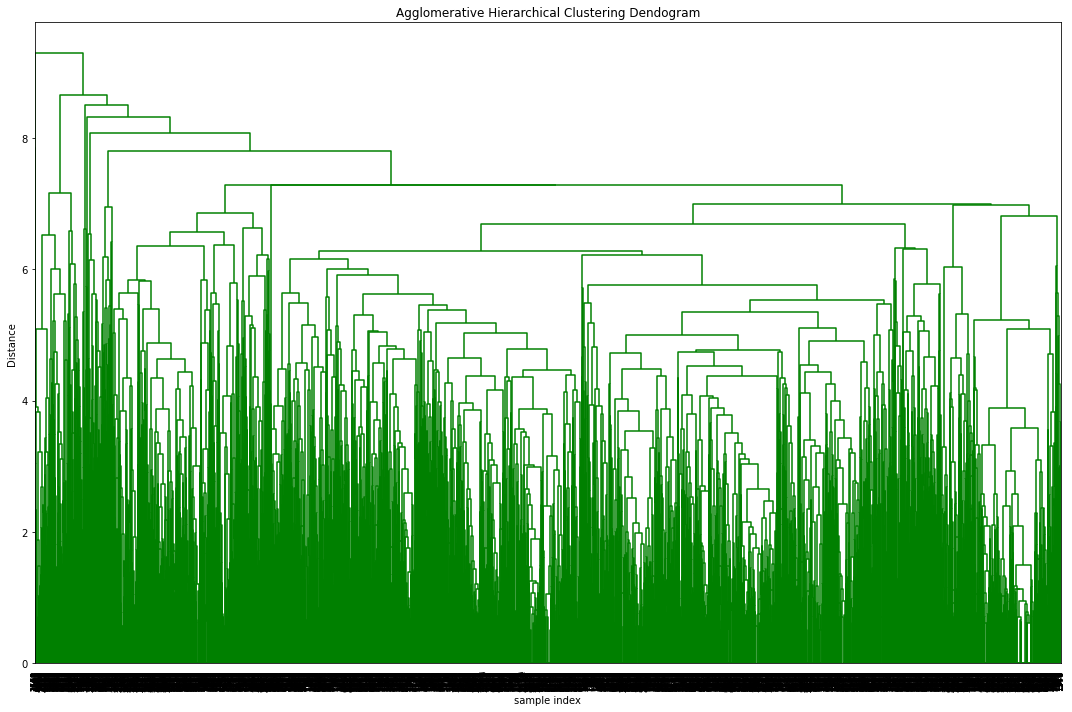

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
x=df.copy()

In [ ]:
x.drop(columns=['User'],inplace=True)

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0.5, 1.0, 'Hierarchical Clustering')

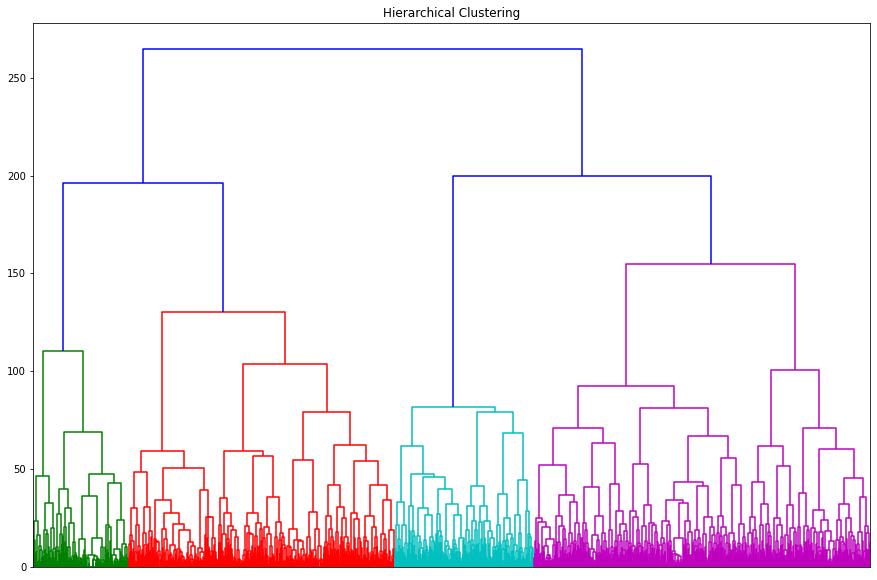

In [ ]:
plt.figure(figsize=(15, 10))
Z = sch.linkage(x,method='ward')
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

In [ ]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

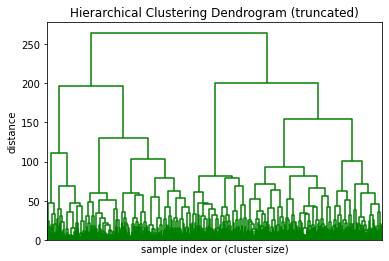

In [ ]:
Z = linkage(x,method='ward')
fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=30000,max_d=80000)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)
